In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.io import loadmat

# Logistic Regression

In [287]:
from scipy.io import loadmat

# Replace 'your_file.mat' with the actual path to your .mat file
mat_data = loadmat('data/LogReg_data_2020.mat')

# Parse Data
mat_a = mat_data['A']
mat_a0 = mat_data['A0']
b = mat_data['b'].flatten()
m = int(mat_data['m'][0][0])
n = int(mat_data['n'][0][0])


In [288]:
mat_a.shape, mat_a0.shape, b.shape, m, n

((100, 10), (100, 10), (100,), 100, 10)

In [289]:
m

100

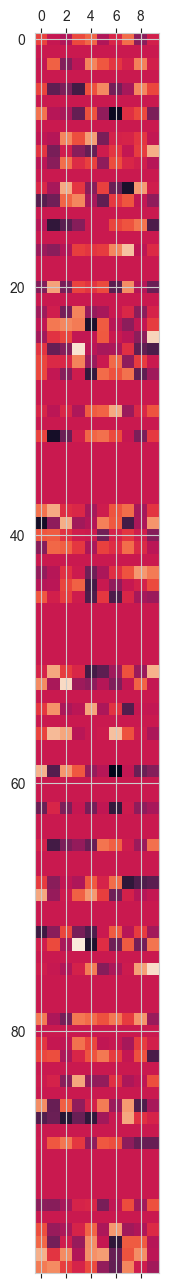

In [290]:
plt.matshow(mat_a - mat_a0)

In [291]:
mat_a0

array([[-6.04567550e-01,  8.21702171e-02,  3.42712087e-01,
        -6.90122615e-01, -1.02419111e+00,  3.68618318e-01,
        -2.23713179e-01, -1.10489164e+00,  8.31987892e-01,
        -1.22235456e-01],
       [ 3.55267713e-02, -6.20063362e-01,  1.42284787e+00,
         8.65845897e-01, -1.91087809e-01, -2.72636107e-01,
        -8.37073311e-01,  1.13330204e-01, -1.00693168e+00,
        -7.21333728e-02],
       [ 1.07076240e-01, -9.80929842e-01,  9.41841185e-01,
         2.27358779e-01, -1.40257426e+00, -8.56089526e-01,
        -4.62931750e-01, -1.35692036e-01, -1.34167100e+00,
        -1.13131221e-01],
       [ 1.57842610e-01,  7.13091768e-01, -2.13735050e+00,
        -1.44993351e+00, -1.73034538e+00,  1.23839909e+00,
         8.76088201e-01,  1.10040947e-01, -6.90923889e-02,
         5.02233276e-01],
       [-6.43723472e-01,  1.43155247e+00,  1.04651509e+00,
         1.84961296e+00, -7.64315951e-01, -1.47227209e+00,
         1.14384436e+00,  4.94136880e-01, -1.42433258e+00,
        -6.

In [292]:
import importlib, utils.logistic_regression
importlib.reload(utils.logistic_regression)


<module 'utils.logistic_regression' from 'C:\\Users\\bayer\\PycharmProjects\\ConvexOpt\\utils\\logistic_regression.py'>

In [184]:
from utils.solvers import gradient_descent
from utils.logistic_regression import logistic_reg_neg_log_likelihood, logistic_reg_neg_log_likelihood_gradient

x = (np.arange(n + 1) + 1).reshape((-1, 1))
logistic_reg_neg_log_likelihood_gradient(x, mat_a0, b)


array([[-0.05259785],
       [ 0.08879922],
       [ 0.10443917],
       [-0.10750185],
       [ 0.18306892],
       [-0.00623853],
       [ 0.22109224],
       [-0.04552904],
       [ 0.18392778],
       [ 0.1255906 ],
       [ 0.23920399]])

[BFGS] Iter 0: ||grad_k||=0.175658, t=1.000e+00
[BFGS] Iter 0: ||grad_k||=0.175658, t=1.000e+00
[BFGS] Iter 0: ||grad_k||=0.175658, t=1.000e+00


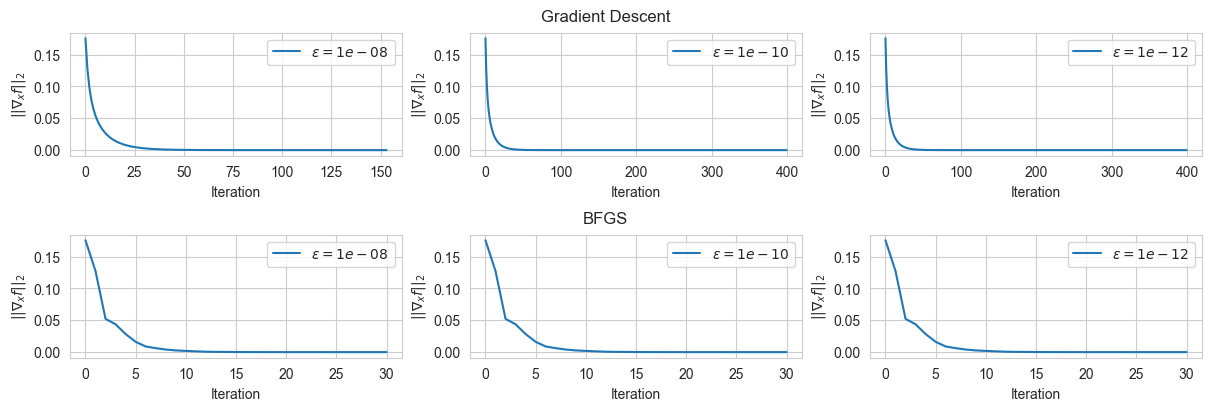

In [294]:
import seaborn as sns

sns.set_style("whitegrid")

func_caller = lambda x: logistic_reg_neg_log_likelihood(x, mat_a0, b)
gradient_caller = lambda x: logistic_reg_neg_log_likelihood_gradient(x, mat_a0, b)

fig = plt.figure(figsize=(12,4), layout='constrained')
subfigs = fig.subfigures(nrows=2, ncols=1)
axs = subfigs[0].subplots(1, 3)
for i, tol in enumerate([1e-8, 1e-10, 1e-12]):
    x_min, grad_norms = gradient_descent(gradient_caller, n, x_0=None, t_0=1, func_caller=func_caller, alpha=0.1, beta=0.8,
                         tol=tol, max_iter=400)
    axs[i].plot(grad_norms, label=f'$\epsilon = {tol}$')
    axs[i].set_xlabel('Iteration')
    axs[i].set_ylabel(r'$||\nabla_x f||_2$')
    axs[i].legend()
subfigs[0].suptitle(f'Gradient Descent')

axs = subfigs[1].subplots(1, 3)
for i, tol in enumerate([1e-8, 1e-10, 1e-12]):
    x_min, grad_norms = bfgs(gradient_caller, n, x_0=None, t_0=1, func_caller=func_caller, alpha=0.1, beta=0.8,
                         tol=1e-8, max_iter=1_000, debug=True)
    axs[i].plot(grad_norms, label=f'$\epsilon = {tol}$')
    axs[i].set_xlabel('Iteration')
    axs[i].set_ylabel(r'$||\nabla_x f||_2$')
    axs[i].legend()
subfigs[1].suptitle(f'BFGS')

plt.savefig("figures/hw2_p1.png")


In [242]:
x_min, grad_norms = gradient_descent(gradient_caller, n, x_0=None, t_0=1, func_caller=func_caller, alpha=0.1, beta=0.8,
                         tol=1e-9, max_iter=1_000, debug=True)

[Grad Descend] Iter 0: ||grad_k||=0.175658, t=1.000e+00
[Grad Descend] Iter 100: ||grad_k||=2.06273e-06, t=1.000e+00
[Amijo] Iter 0: f_k=0.622600, f_next=0.622600, t=1.000e+00
[Amijo] Iter 0: f_k=0.622600, f_next=0.622600, t=8.000e-01
[Amijo] Iter 0: f_k=0.622600, f_next=0.622600, t=5.120e-01
[Amijo] Iter 0: f_k=0.622600, f_next=0.622600, t=2.621e-01
[Amijo] Iter 0: f_k=0.622600, f_next=0.622600, t=6.872e-02
[Amijo] Iter 0: f_k=0.622600, f_next=0.622600, t=2.815e-02
[Amijo] Iter 0: f_k=0.622600, f_next=0.622600, t=5.903e-03
[Amijo] Iter 0: f_k=0.622600, f_next=0.622600, t=3.022e-03
[Amijo] Iter 0: f_k=0.622600, f_next=0.622600, t=2.418e-03
[Amijo] Iter 0: f_k=0.622600, f_next=0.622600, t=1.934e-03
[Amijo] Iter 0: f_k=0.622600, f_next=0.622600, t=1.063e-04
[Amijo] Iter 0: f_k=0.622600, f_next=0.622600, t=4.356e-05
[Amijo] Iter 0: f_k=0.622600, f_next=0.622600, t=2.230e-05
[Amijo] Iter 0: f_k=0.622600, f_next=0.622600, t=5.022e-07
[Amijo] Iter 0: f_k=0.622600, f_next=0.622600, t=4.017e-0

C:\Users\bayer\PycharmProjects\ConvexOpt\utils\solvers.py:63: UserWarning: Maximum number of iterations reached (1000) in gradient descent
  


In [245]:
x_min, grad_norms = bfgs(gradient_caller, n, x_0=None, t_0=1, func_caller=func_caller, alpha=0.1, beta=0.8,
                         tol=1e-8, max_iter=1_000, debug=True)

[Grad Descend] Iter 0: ||grad_k||=0.175658, t=1.000e+00


# Lasso

In [302]:
from scipy.io import loadmat

# Replace 'your_file.mat' with the actual path to your .mat file
mat_data = loadmat('data/Lasso_data.mat')

# Parse Data
mat_a = mat_data['A']
b = mat_data['b'].flatten()
tau = float(mat_data['tau'][0][0])
xs = mat_data['xs']
n = mat_a.shape[1]

In [304]:
mat_a.shape,b.shape, tau, xs.shape, n

((512, 1024), (512,), 10.0, (1024, 1), 1024)

In [328]:
import importlib, utils.lasso
importlib.reload(utils.lasso)
from utils.lasso import *

In [329]:
import importlib, utils.solvers
importlib.reload(utils.solvers)
from utils.solvers import *

In [ ]:
import seaborn as sns

from utils.solvers import sub_gradient_method, ista

sns.set_style("whitegrid")

func_caller = lambda x: lasso_f(x, mat_a, b, tau)
sub_gradient_caller = lambda x: lasso_sub_gradient(x, mat_a, b, tau)
gradient_caller = lambda x: lasso_diffable_gradient(x, mat_a, b)
proximal_mapping = lambda x, t: proximal_l1(x, tau * t)
lipschitz_const = lipschitz_const_caller(mat_a)

fig = plt.figure(figsize=(12,4), layout='constrained')
axs = fig.subplots(2, 1)


for i, tol in enumerate([1e-3]):
    x_min, rel_errors = sub_gradient_method(sub_gradient_caller, n, func_caller, xs=xs, t_0=.01, tol=tol, max_iter=5_000)
    axs[0].plot(rel_errors, label=f'$\epsilon = {tol}$')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel(r'$|f^k_{best} - f_s| / f_s$')
    axs[0].legend()
axs[0].set_title(f'Subgradient Method')

for i, tol in enumerate([1e-3]):
    x_min, rel_errors = ista(gradient_caller, proximal_mapping, n, func_caller, lipschitz_const, xs=xs, tol=tol, max_iter=5_000)
    axs[1].plot(rel_errors, label=f'$\epsilon = {tol}$')
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel(r'$|f^k - f_s| / f_s$')
    axs[1].legend()
axs[0].set_title(f'ISTA Proximal Gradient Method')
plt.savefig("figures/hw2_p2.png")

In [331]:
rel_errors

[np.float64(46.56184003157216),
 np.float64(25.723667667638267),
 np.float64(17.757167942312204),
 np.float64(13.907602695806345),
 np.float64(11.743680933365088),
 np.float64(10.39772710753095),
 np.float64(9.482974124597998),
 np.float64(8.825119821214203),
 np.float64(8.327951605916187),
 np.float64(7.93663921343013),
 np.float64(7.614701946802645),
 np.float64(7.3429281956573345),
 np.float64(7.108548661830572),
 np.float64(6.9027563261632165),
 np.float64(6.717981023149357),
 np.float64(6.550572393404326),
 np.float64(6.396402065295947),
 np.float64(6.252330523886757),
 np.float64(6.116558707257669),
 np.float64(5.988215915823491),
 np.float64(5.8659392426419465),
 np.float64(5.748687468234366),
 np.float64(5.635486071187775),
 np.float64(5.526040127221527),
 np.float64(5.420656365483075),
 np.float64(5.318566753344166),
 np.float64(5.219308717561402),
 np.float64(5.123382038500272),
 np.float64(5.030249964788439),
 np.float64(4.939455148090513),
 np.float64(4.850480698906749),
 n